<a href="https://colab.research.google.com/github/OnurcanKoken/TensorFlow_Workshops_Colab_General_Usage/blob/master/NLP/NLP_T%C3%BCrk%C3%A7e_Metin_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derin Öğrenmeyle Türkçe Metin Sınıflandırma

Onurcan Köken

10.04.2021

İçindekiler:
* Veriyi Tanıma Aşaması
* Derin Öğrenmeyle Türkçe Metin Sınıflandırma
* XGBoost 

Kaynak: https://www.kaggle.com/erdal002/turkish-text-classification

# Veriyi Tanıma Aşaması
Burada veriyi tanımaya çalıştım.

In [ ]:
# pandas kütüphanesi
import pandas as pd

In [ ]:
# ver setini okuma ve ilk satırlarını gösterme
df = pd.read_csv('/content/7allV03.csv')
df.head()

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


In [ ]:
# veri setinin tipi
type(df)

pandas.core.frame.DataFrame

In [ ]:
# veri seti içinde her bir kategorideki metin sayısı
df['category'].value_counts()

siyaset       700
ekonomi       700
spor          700
dunya         700
teknoloji     700
saglik        700
kultur        700
Name: category, dtype: int64

In [ ]:
# veri seti içerisindeki kategori sayısı
df['category'].value_counts().count()

7

In [ ]:
# veri seti
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [ ]:
# ilk metin
df['text'][0]

' 3 milyon ile ön seçim vaadi mhp nin 10 olağan büyük kurultayı nda konuşan genel başkan adayı koray_aydın seçimlerden önce partinin üye sayısının 3 milyona ulaştırılması hedefini koyarak ön seçim uygulaması vaadinde bulundu mhp nin 10 olağan büyük kurultayı nda konuşan genel başkan adayı koray_aydın seçimlerden önce partinin üye sayısının 3 milyona ulaştırılması hedefini koyarak ön seçim uygulaması vaadinde bulundu genel_başkan adayı koray_aydın kürsüye beklenirken yapılan tezahüratlar ve ıslıklamalar üzerine divan başkanı tuğrul_türkeş mhp nin genel başkanlığı da genel başkan adaylığı da saygıdeğer işlerdir bu salondaki herkes ciddiye almak zorundadır dedi ve taşkınlıklara izin verilmeyeceğini salonda sükunet sağlanmadan konuşmaların başlamayacağını vurguladı türkeş devlet_bahçeli nin kurultay açılışında konuştuğu için adaylık nedeniyle ikinci bir konuşma yapmayacağını açıkladı konuşmasında kurultayın mhp nin tek başına iktidarına vesile olmasını dileyen aydın ak_parti nin mhp yi ele

Diğer aşamalarda gerekli olacak kütüphaneler

In [ ]:
# gerekli kütüphaneler
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import tensorflow as tf
import re # regular expression libary
import seaborn as sns 
import nltk # Natural Language toolkit
nltk.download("stopwords")  #downloading stopwords
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Derin Öğrenmeyle Türkçe Metin Sınıflandırma 
**Turkish Text Classification with Deep Learning**

İlgili Derin Öğrenme kodu kaggle'dan çekilmiştir. Bunun dışında daha farklı çözüm yöntemleri de orada bulunuyor. Onlar da alternatif olarak denenebilir. Aralara kendi yorumlarımı, açıklamalarımı ekledim.

Özellikle bunu seçmemin nedeni modeli kendimiz oluşturduğumuz için daha net anlaşılır, kafada soru işareti daha az kalır diye düşünüyorum.


In [ ]:
# orijinal veri seti üzerinde değişiklik yapmamak için kopyasını alıyoruz
df_copy=df.copy()
new_dataset = df_copy.text.copy()
new_dataset.head()

0     3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1     mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2     disko lar kaldırılıyor başbakan_yardımcısı ar...
3     sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4     erdoğan idamın bir haklılık sebebi var demek ...
Name: text, dtype: object

In [ ]:
# metinleri x listesine kaydediyoruz
x_list=[] # store text in this list

# veri seti içerisindeki her bir metne bakıyor
for text in new_dataset:
    text = text.lower() # büyük harften küçük harfe çevirme
    # türkçe karakterler
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text = text.split()
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    text=" ".join(text)
    x_list.append(text) # store sentences in list

In [ ]:
# metinleri sayısallaştırıyoruz
# One-Hot Encoder yerine Label Encoder kullanıyoruz
le = preprocessing.LabelEncoder()
labels=le.fit_transform(df_copy.category)
labels # kategorilerimizi sayısallaştırdık

array([4, 4, 4, ..., 6, 6, 6])

In [ ]:
# etiketlerden oluşan list'i oluşturuyoruz
y_label=[]

for i in labels:
    y_label.append(i)

In [ ]:
y_label[0:10]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [ ]:
# ilgili veriyi yüzde 20si test veri seti olacak şekilde train ve test olarak etiketleriyle beraber ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(x_list, y_label, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
# burada da görülebileceği üzere yüzde 20si test, yüzde80i train olarak ayrıldı
print(len(X_train)) # 3920 sentences
print(len(y_train)) #3920 Labels
print(len(X_test))  # 980 sentences
print(len(y_test)) # 980 labels

3920
3920
980
980


In [ ]:
# Tokenization işlemiyle kelimelerin ayrılması
# çıktı olarak toplamda 94836 kelime elde ediyoruz
max_lenght=100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index # creating word dict for words in training
sequences = tokenizer.texts_to_sequences(X_train)  # replacing words with the number corresponding to them in the dictionary(word_index)

X_train_padded = pad_sequences(sequences, padding='post',maxlen=max_lenght) # padding words

print(len(word_index)) # I have 94836 words in my dictionary

94836


In [ ]:
print("Original Version:",X_train[0])
print("---------------------------------")
print("Padded version",X_train_padded[0]) 
print("---------------------------------")
print("Tokenized version:",sequences[0])  # change words with number that corresponding to word word_index
print("---------------------------------")
print("Shape after the padding:",X_train_padded.shape) # make our input same size

Original Version: internet e plorer un son versiyonu hazırlanıyor microsoft internet e plorer tarayıcısının son sürümünü milyondan fazla bilgisayar kullanıcısına ulaştırmak son hazırlıklarını yapıyor microsoft ürettikleri işletim sistemlerinden bilgisayar kullanıcıları tarafından tercih edilen indo s kullanıcılarının internet e plorer tarayıcısını kullanabileceğini bildirdi indo s kullanıcıları geçen yılın kasım ayının ortalarından itibaren internet e plorer un ön sürümünü internetten yükleyebiliyor internet e plorer un son sürümü indo s kullanıcılarına otomatik güncelleme olarak gönderilecek son tarayıcının kasım ayında piyasaya sürülen indo s e sahip bilgisayarların içine kurulduğu belirtildi
---------------------------------
Padded version [  113    27  8057    50    20  7270  2457  1162   113    27  8057 37497
    20 18044  3903    52   671 18045 13109    20  5572   631  1162 11186
  1428 24119   671  2458    33   471   151  1445   187  2904   113    27
  8057 54140 37498   282  14

In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,padding="post",maxlen=max_lenght)

In [ ]:
print("Original Version:",X_test[0])
print("---------------------------------")
print("Padded version",X_test_padded[0])   # make inputs same size
print("---------------------------------")
print("Tokenized version:",X_test_sequences[0]) # change words with number that corresponding to word word_index
print("---------------------------------")
print("Shape after the padding:",X_test_padded.shape) # make inputs same size

Original Version: acıların kedisi sam çatık kaşlı kedi sam in internetteki yükselişi sürüyor sam in kaşlarının boya olmadığı kesinleşirken acıların kedisi görünümle hayvanın instagram hesabı popülerliliğini artırıyor
---------------------------------
Padded version [21442 74989 43332 25561 13814 43332     8 14911 13820  1535 43332     8
  5769   670 21442 74989 69295 11068  2807  3625  3873     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
---------------------------------
Tokenized version: [21442, 74989, 43332, 25561, 13814, 43332, 8, 14911, 13820, 1535, 43332

In [ ]:
# Modeli oluşturduğumuz bölüm
# Çıktımız softmax, 7 sınıf - kategori

vocab_size = len(tokenizer.word_index)+1
embedding_dim=16

model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

adam= tf.keras.optimizers.Adam(lr=0.01) 


model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           1517392   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

In [ ]:
y_train_label=np.asarray(y_train).reshape(-1,1)
y_test_label=np.asarray(y_test).reshape(-1,1)

In [ ]:
# Model Eğitimi - Epoch - Batch Size
# Training veri seti burada validation için bölünüyor
num_epochs = 10
BATCH_SIZE=64
history=model.fit(X_train_padded,y_train_label,batch_size=BATCH_SIZE ,epochs=num_epochs, validation_data=(X_test_padded,y_test_label))

Epoch 1/10
62/62 [==============================] - 12s 132ms/step - loss: 2.2800 - accuracy: 0.1854 - val_loss: 1.7761 - val_accuracy: 0.3082
Epoch 2/10
62/62 [==============================] - 7s 119ms/step - loss: 0.7790 - accuracy: 0.7256 - val_loss: 1.2230 - val_accuracy: 0.6306
Epoch 3/10
62/62 [==============================] - 7s 118ms/step - loss: 0.1805 - accuracy: 0.9482 - val_loss: 0.9297 - val_accuracy: 0.7133
Epoch 4/10
62/62 [==============================] - 7s 120ms/step - loss: 0.0417 - accuracy: 0.9915 - val_loss: 0.8044 - val_accuracy: 0.7235
Epoch 5/10
62/62 [==============================] - 7s 117ms/step - loss: 0.0209 - accuracy: 0.9966 - val_loss: 0.7773 - val_accuracy: 0.7418
Epoch 6/10
62/62 [==============================] - 7s 118ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.7749 - val_accuracy: 0.7510
Epoch 7/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0412 - accuracy: 0.9900 - val_loss: 0.8682 - val_accuracy: 0.7714
Epoch

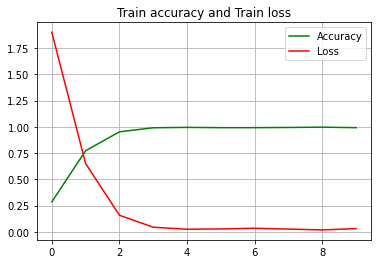

In [ ]:
# Train Accuracy - Train Loss Grafiği
plt.plot(history.history["accuracy"],color="green")
plt.plot(history.history["loss"],color="red")
plt.title("Train accuracy and Train loss")
plt.legend(["Accuracy","Loss"])
plt.grid()

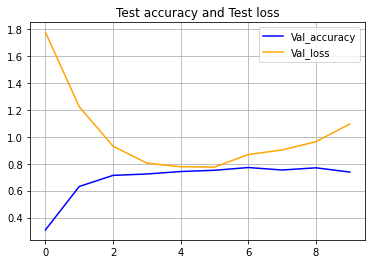

In [ ]:
# Validation Accuracy - Validation Loss Grafiği
plt.plot(history.history["val_accuracy"],color="blue")
plt.plot(history.history["val_loss"],color="orange")
plt.title("Test accuracy and Test loss")
plt.legend(["Val_accuracy","Val_loss"])
plt.grid()

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train_padded,y_train_label)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test_padded,y_test_label)[1]*100 , "%")

123/123 [==============================] - 2s 17ms/step - loss: 0.0117 - accuracy: 0.9972
Accuracy of the model on Training Data is -  99.71938729286194 %
31/31 [==============================] - 1s 16ms/step - loss: 1.0947 - accuracy: 0.7378
Accuracy of the model on Testing Data is -  73.77551198005676 %


Model eğitimi sonunda elde ettiğimiz grafiklerden yola çıkarak model çok kısa bir sürede veri setini ezberlemiş durumdadır.

In [ ]:
# Test aşaması
pred = model.predict_classes(X_test_padded)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# tahmin edilen sınıflar
pred[10:20]

array([3, 6, 4, 0, 6, 5, 3, 4, 1, 6])

In [ ]:
# gerçekte olması gereken sınıflar
y_test_label[10:20]

array([[3],
       [4],
       [4],
       [0],
       [6],
       [5],
       [3],
       [3],
       [0],
       [6]])

Tahmin  Sonucu:         3 - 6 - 4 - 0 - 6 - 5 - 3 - 4 - 1 - 6 

Olması Gereken: 3 - 4 - 4 - 0 - 6 - 5 - 3 - 3 - 0 - 6


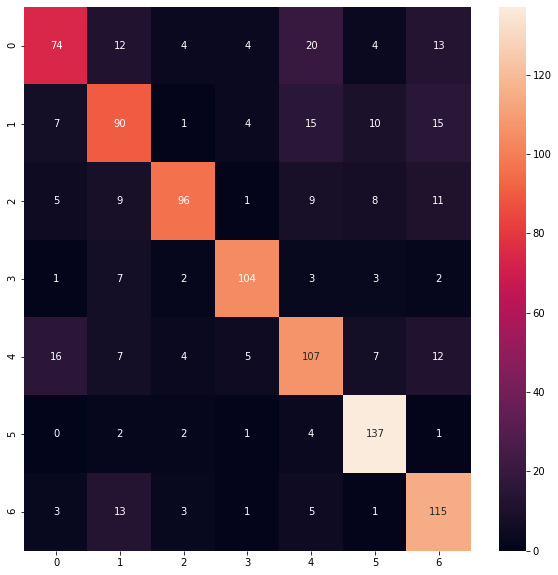

In [ ]:
# Karışıklık Matrisi - Confusion Matrix
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linecolor="white",fmt='')

İlgili matrise bakarak genel olarak doğru bir değerlendirme yapıldığı gözüküyor, her bir sınıfa karşılık gelen sınıfa bakarak değerlendirilebilir. Net bir değerlendirme yapmak için Precision, Recall ve f1-score değerlerine bakılarak modelin başarısı hakkında daha iyi yorum yapılabilir.

In [ ]:
# Diğer model değerlendirme metrikleri de her bir kategori için aşağıdaki gibidir
print(classification_report(y_test_label,pred)) # model is better when classify 3 and 5 classes

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       131
           1       0.64      0.63      0.64       142
           2       0.86      0.69      0.76       139
           3       0.87      0.85      0.86       122
           4       0.66      0.68      0.67       158
           5       0.81      0.93      0.86       147
           6       0.68      0.82      0.74       141

    accuracy                           0.74       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.74      0.74      0.74       980



# XGBoost

Bu bölüm de aynı şekilde Kaggle'dan çekilmiştir. Ben sadece biraz düzenledim, yorum ve açıklamalar ekledim.

In [ ]:
# orijinal veri seti üzerinde değişiklik yapmamak için kopyasını alıyoruz
df_copy=df.copy()
df_copy.head()

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


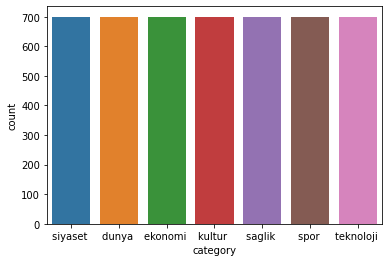

In [ ]:
# veriyi görselleştirme
sns.countplot("category",data=df_copy)

In [ ]:
# metinleri sayısallaştırıyoruz
# One-Hot Encoder yerine Label Encoder kullanıyoruz
le = preprocessing.LabelEncoder()
labels=le.fit_transform(df_copy.category)
labels # kategorilerimizi sayısallaştırdık

array([4, 4, 4, ..., 6, 6, 6])

In [ ]:
import nltk
import nltk as nlp
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# metinleri x listesine kaydediyoruz
text_list=[] # store text in this list

# veri seti içerisindeki her bir metne bakıyor
for text in df_copy.text:
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    text_list.append(text) # store sentences in list

In [ ]:
len(text_list)

4900

In [ ]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer 

max_features=500 # "number" most common(used) words in reviews

count_vectorizer=CountVectorizer(max_features=max_features) 

sparce_matrix=count_vectorizer.fit_transform(text_list).toarray()

sparce_matrix.shape #4900 sentences 500 most used words

(4900, 500)

In [ ]:
X=sparce_matrix
y=labels

In [ ]:
# veriyi train ve test için ayırıyoruz
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# XGBoost Modelini eğitiyoruz
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_model=xgb.fit(X_train,y_train)

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# XGBoost Modelini test ediyoruz
y_pred=xgb_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))

Accuracy: 0.7918367346938775
Precision: 0.7918367346938775


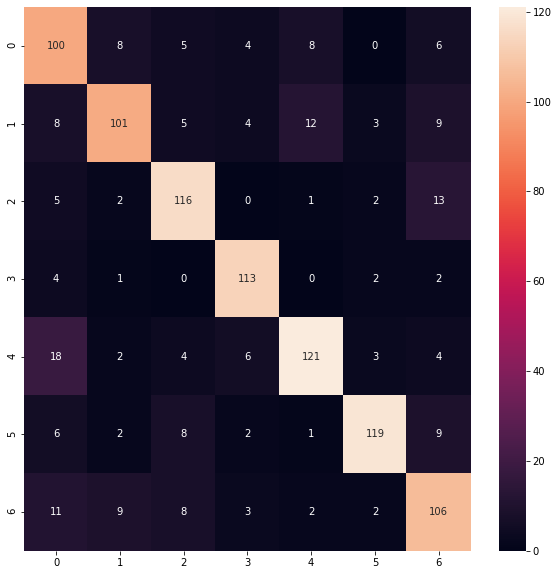

In [ ]:
# Karşıtlık Matrisi - Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d') 

In [ ]:
print(classification_report(y_test, y_pred)) 
# classification report is good function for seeing how well our model predict labels in each class  

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       131
           1       0.81      0.71      0.76       142
           2       0.79      0.83      0.81       139
           3       0.86      0.93      0.89       122
           4       0.83      0.77      0.80       158
           5       0.91      0.81      0.86       147
           6       0.71      0.75      0.73       141

    accuracy                           0.79       980
   macro avg       0.80      0.79      0.79       980
weighted avg       0.80      0.79      0.79       980

